In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [114]:
df = pd.read_csv('datasets/diabetes_prediction_dataset.csv')

In [115]:
df.shape

(100000, 9)

In [116]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [117]:
df.describe(include = 'all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [118]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [119]:
df = df[(df['gender']=='Male') | (df['gender']=='Female')]
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

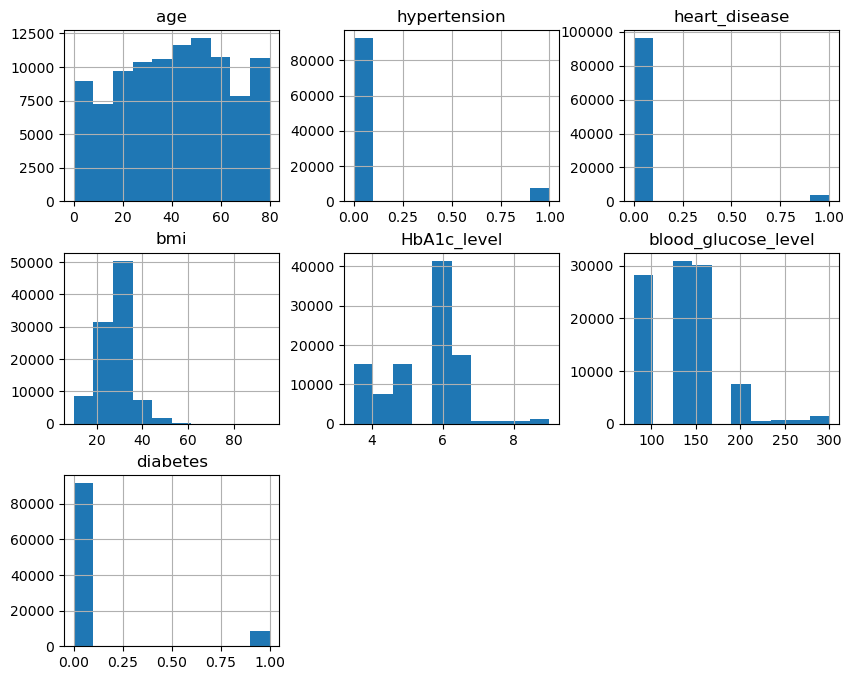

In [121]:
df.hist(figsize=(10,8))

In [122]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [123]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [124]:
dummies = pd.get_dummies(df['smoking_history'])
dummies

,No Info,current,ever,former,never,not current
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
99995,1,0,0,0,0,0
99996,1,0,0,0,0,0
99997,0,0,0,1,0,0
99998,0,0,0,0,1,0


In [125]:
df1 = pd.concat([df.drop(['smoking_history'], axis='columns'), dummies], axis='columns')

In [126]:
df1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [127]:
x = df1.drop(['diabetes'], axis='columns')
y = df1['diabetes']

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [129]:
y_pred =0
def regressor(model):
    model.fit(x_train, y_train)
    scores = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(scores)

In [130]:
regressor(LogisticRegression())

0.9579532725236037


C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [131]:
regressor(RandomForestClassifier())

0.9696351416226596


In [132]:
regressor(DecisionTreeClassifier())

0.9502720435269643


In [133]:
rfr_model = RandomForestClassifier(criterion='gini',max_features='log2')
rfr_model.fit(x_train, y_train)

RandomForestClassifier(max_features='log2')

In [134]:
rfr_model.score(x_test, y_test)

0.9693951032165147

In [135]:
df1.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
gender,1.000000,-0.030369,0.014381,0.077886,-0.023023,0.020044,0.017196,0.037623,0.053833,0.026589,0.011005,0.049002,-0.098618,-0.011758
age,-0.030369,1.000000,0.251163,0.233352,0.337378,0.101343,0.110679,0.257999,-0.276993,0.030917,0.065792,0.216468,0.065423,0.067946
hypertension,0.014381,0.251163,1.000000,0.121253,0.147679,0.080941,0.084436,0.197811,-0.117223,0.017914,0.023131,0.083386,0.045937,0.001077
heart_disease,0.077886,0.233352,0.121253,1.000000,0.061203,0.067591,0.070071,0.171718,-0.052405,0.007592,0.040679,0.095184,-0.030859,0.007983
bmi,-0.023023,0.337378,0.147679,0.061203,1.000000,0.083017,0.091310,0.214377,-0.222579,0.053623,0.044353,0.111322,0.086803,0.035093
HbA1c_level,0.020044,0.101343,0.080941,0.067591,0.083017,1.000000,0.166831,0.400696,-0.045949,0.006117,0.009702,0.037303,0.010719,0.009676
blood_glucose_level,0.017196,0.110679,0.084436,0.070071,0.091310,0.166831,1.000000,0.419587,-0.051692,0.012450,0.006284,0.040692,0.012463,0.008725
diabetes,0.037623,0.257999,0.197811,0.171718,0.214377,0.400696,0.419587,1.000000,-0.118953,0.019588,0.024088,0.097901,0.027248,0.020831
No Info,0.053833,-0.276993,-0.117223,-0.052405,-0.222579,-0.045949,-0.051692,-0.118953,1.000000,-0.239028,-0.152558,-0.239964,-0.549344,-0.195990
current,0.026589,0.030917,0.017914,0.007592,0.053623,0.006117,0.012450,0.019588,-0.239028,1.000000,-0.065347,-0.102787,-0.235307,-0.083951


In [136]:
y_pred = rfr_model.predict(x_test)

In [137]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22877
           1       0.94      0.68      0.79      2119

    accuracy                           0.97     24996
   macro avg       0.96      0.84      0.89     24996
weighted avg       0.97      0.97      0.97     24996



In [138]:
y_pred = rfr_model.predict(x_test)

In [142]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[22787,    90],
       [  675,  1444]], dtype=int64)

In [143]:
def find_best_model(x, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2', 'elasticnet', None],
                'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ["gini", "entropy", "log_loss"],
                'splitter': ['best', 'random'],
                'max_features' : ["auto", "sqrt", "log2"]
            }
        },
        'Random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ["gini", "entropy", "log_loss"],
                'n_estimators' : [10, 20, 50, 100],
                'max_features' : ["sqrt", "log2", None]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoname, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algoname,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x_train, y_train)

NameError: name 'ShuffleSplit' is not defined

In [145]:
corr_matrix = df1.corr()
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419587
HbA1c_level            0.400696
age                    0.257999
bmi                    0.214377
hypertension           0.197811
heart_disease          0.171718
former                 0.097901
gender                 0.037623
never                  0.027248
ever                   0.024088
not current            0.020831
current                0.019588
No Info               -0.118953
Name: diabetes, dtype: float64

In [146]:
df1 = pd.get_dummies(df)
df1[df1['diabetes']==1]

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
6,0,44.0,0,0,19.31,6.5,200,1,0,0,0,0,1,0
26,1,67.0,0,1,27.32,6.5,200,1,0,0,0,0,0,1
38,1,50.0,1,0,27.32,5.7,260,1,0,1,0,0,0,0
40,1,73.0,0,0,25.91,9.0,160,1,0,0,0,1,0,0
53,0,53.0,0,0,27.32,7.0,159,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99935,0,65.0,1,1,33.55,8.2,140,1,0,0,0,0,1,0
99938,1,55.0,0,1,30.42,6.2,300,1,0,0,0,1,0,0
99957,0,61.0,0,0,34.45,6.5,280,1,1,0,0,0,0,0
99962,0,58.0,1,0,38.31,7.0,200,1,0,0,0,0,1,0


In [147]:
df1['gender'].value_counts()

0    58552
1    41430
Name: gender, dtype: int64

In [148]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'smoking_history_No Info',
       'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current'],
      dtype='object')

In [149]:
def classify_diabetes(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender, smoking_history):
    gender_index = np.where(x.columns==gender)[0][0]
    smoking_history_index = np.where(x.columns==smoking_history)[0][0]
    
    var = np.zeros(len(x.columns))
    var[0] = age
    var[1] = hypertension
    var[2] = heart_disease
    var[3] = bmi
    var[4] = HbA1c_level
    var[5] = blood_glucose_level
    
    if gender_index >= 0 and smoking_history_index >= 0:
        var[gender_index] = 1
        var[smoking_history_index] = 1
    print(var)
    return rfr_model.predict([var])[0]

In [31]:
classify_diabetes(44, 0, 0, 19.32, 6.5, 200, 'gender_Female', 'smoking_history_never')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
import pickle
with open('diabetes_classifier.pickle', 'wb') as f:
    pickle.dump(rfr_model, f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('diabetes_classifier_columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [ ]:
col = ''
with open('diabetes_classifier_columns.json', 'r') as f:
    col = json.load(f)['data_columns']

In [ ]:
for i in col[9:]:
    print(i)

In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[22787,    90],
       [  675,  1444]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

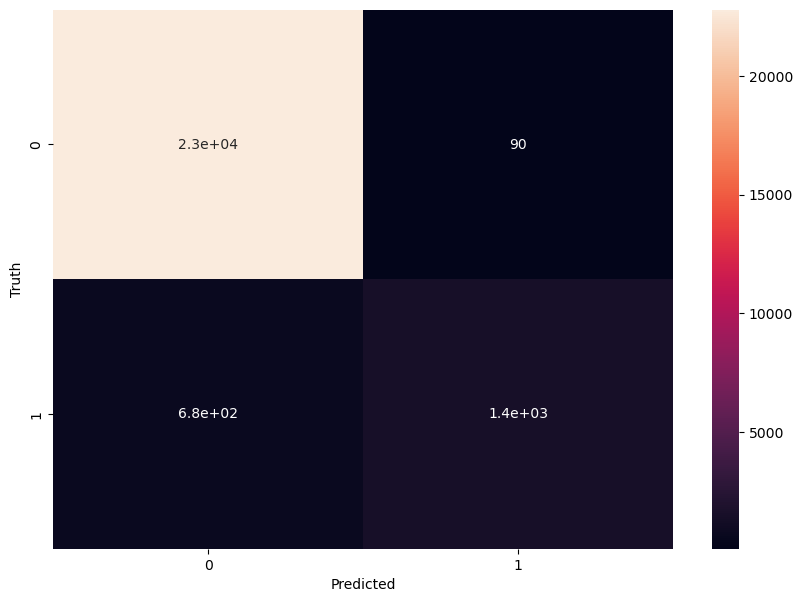

In [151]:
# Here we visualize the error
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')